# Spotify Streaming History

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei'] # Allow Chinese in plot text
plt.rcParams['font.size'] = '20'


In this notebook I look at my `Spotify` streaming data from the period between `2021-07-15` and `2022-07-02`, downloaded from Spotify. 

## Loading Streaming Data
I load the two streaming frames and combine them.

In [3]:
streaming_frame_0 = pd.read_json('MyData/StreamingHistory0.json')
streaming_frame_1 = pd.read_json('MyData/StreamingHistory1.json')

In [4]:
streaming_frame_0.head()

,endTime,artistName,trackName,msPlayed
0,2021-07-05 06:57,William Segerdahl,Det Kanske Inte är Så Farligt?,786
1,2021-07-11 18:36,William Segerdahl,Det Kanske Inte är Så Farligt?,5370
2,2021-07-11 19:10,Kenji Kawai,反省 (Instrumental),9950
3,2021-07-15 17:04,GAMMAL,Hoppas det är bra,2500
4,2021-07-15 17:04,GAMMAL,Sånger från förut,2723


In [5]:
streaming_frame_1.head()

,endTime,artistName,trackName,msPlayed
0,2022-05-22 20:43,하근영,"20년 전에도, 지금도.",5030
1,2022-05-22 20:43,하근영,무뎌진 슬픔,4690
2,2022-05-22 20:43,BIBI,Timeless,4060
3,2022-05-22 20:43,하근영,Salon Fight,3490
4,2022-05-22 20:44,Erik Satie,Gnossienne No.1,6090


In [6]:
spotify_streaming_frame = pd.concat([streaming_frame_0, streaming_frame_1])

In [7]:
spotify_streaming_frame.head()

,endTime,artistName,trackName,msPlayed
0,2021-07-05 06:57,William Segerdahl,Det Kanske Inte är Så Farligt?,786
1,2021-07-11 18:36,William Segerdahl,Det Kanske Inte är Så Farligt?,5370
2,2021-07-11 19:10,Kenji Kawai,反省 (Instrumental),9950
3,2021-07-15 17:04,GAMMAL,Hoppas det är bra,2500
4,2021-07-15 17:04,GAMMAL,Sånger från förut,2723


## Cleaning and Reformatting

### Removing tracks played for less than 30 seconds

In [8]:
threshold = 30000
spotify_streaming_frame = spotify_streaming_frame.loc[spotify_streaming_frame.msPlayed > threshold]

In [9]:
spotify_streaming_frame.head()

,endTime,artistName,trackName,msPlayed
6,2021-07-15 17:07,GAMMAL,Vackrare än dom,197076
7,2021-07-15 17:10,GAMMAL,Vackrare än dom,197076
8,2021-07-15 17:14,GAMMAL,Elsa,227485
9,2021-07-15 17:17,GAMMAL,Katedral,182088
11,2021-07-17 02:10,VERIVERY,gogobebe,265045


### Removing podcasts

In [10]:
len(spotify_streaming_frame)

10088

In [11]:
podcasts = ['Olösta Fall', 'Henry läser Wikipedia', 'Learn Japanese with Noriko', 'Sekter', 'Solcellskollens podcast']
spotify_streaming_frame = spotify_streaming_frame.loc[~spotify_streaming_frame.artistName.isin(podcasts)]

In [12]:
len(spotify_streaming_frame)

10072

### Converting endTime column to DateTime

In [13]:
spotify_streaming_frame.endTime = pd.to_datetime(spotify_streaming_frame.endTime)

In [14]:
spotify_streaming_frame.head()

,endTime,artistName,trackName,msPlayed
6,2021-07-15 17:07:00,GAMMAL,Vackrare än dom,197076
7,2021-07-15 17:10:00,GAMMAL,Vackrare än dom,197076
8,2021-07-15 17:14:00,GAMMAL,Elsa,227485
9,2021-07-15 17:17:00,GAMMAL,Katedral,182088
11,2021-07-17 02:10:00,VERIVERY,gogobebe,265045


In [15]:
min(spotify_streaming_frame.endTime)

Timestamp('2021-07-15 17:07:00')

In [16]:
max(spotify_streaming_frame.endTime)

Timestamp('2022-07-02 19:25:00')

## When do I listen to music?

In [17]:
spotify_streaming_frame['hour'] = spotify_streaming_frame.endTime.apply(lambda x: x.hour)

In [18]:
spotify_streaming_frame.head()

,endTime,artistName,trackName,msPlayed,hour
6,2021-07-15 17:07:00,GAMMAL,Vackrare än dom,197076,17
7,2021-07-15 17:10:00,GAMMAL,Vackrare än dom,197076,17
8,2021-07-15 17:14:00,GAMMAL,Elsa,227485,17
9,2021-07-15 17:17:00,GAMMAL,Katedral,182088,17
11,2021-07-17 02:10:00,VERIVERY,gogobebe,265045,2


<ipython-input-19-4b1e1eeefb24>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticks)


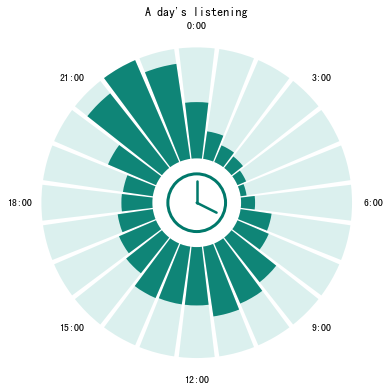

In [19]:
#Based on this thread: https://stackoverflow.com/questions/49709030/bar-plot-with-polar-axis

df = pd.DataFrame({"COL": spotify_streaming_frame['hour']}).COL.value_counts().sort_index()
maximum = max(df) 

N = 24
bottom = 400
theta, width = np.linspace(0.0, 2 * np.pi, N, endpoint=False, retstep=True)

plt.figure(figsize = (10, 6))
ax = plt.subplot(111, polar=True)

bars = ax.bar(
    theta, df,
    width=width-0.03,
    bottom=bottom,
    color="#00796B"
)
bars = ax.bar(
    theta, [maximum]*24,
    width=width-0.03,
    bottom=bottom,
    color="#4DB6AC", alpha=0.2
)

ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.grid(False)
ax.spines['polar'].set_visible(False)
ax.set_rticks([])

ticks = [f"{i}:00" for i in range(0, 24, 3)]
ax.set_xticklabels(ticks)

## Draw a "clock" icon inside of the graph
##lines for hands of a clock
x1, y1 = [0, 90], [0, 0.5*bottom]
x2, y2 = [0,0], [0, 0.5*bottom]
plt.plot(x1, y1, x2, y2, linewidth=2.5, solid_capstyle='round', color="#00796B", alpha=1)

##circle for clockface
circle = plt.Circle((0, 0), 0.65*bottom, transform=ax.transData._b, linewidth=3, fill=False, color="#00796B", alpha=1)
ax.add_artist(circle)
ax.set_title('A day\'s listening')

_ = ax

I listen to the most music around 10 P.M. 

In [20]:
spotify_streaming_frame['month'] = spotify_streaming_frame.endTime.apply(lambda x: x.month_name())

In [21]:
spotify_streaming_frame.head()

,endTime,artistName,trackName,msPlayed,hour,month
6,2021-07-15 17:07:00,GAMMAL,Vackrare än dom,197076,17,July
7,2021-07-15 17:10:00,GAMMAL,Vackrare än dom,197076,17,July
8,2021-07-15 17:14:00,GAMMAL,Elsa,227485,17,July
9,2021-07-15 17:17:00,GAMMAL,Katedral,182088,17,July
11,2021-07-17 02:10:00,VERIVERY,gogobebe,265045,2,July


<AxesSubplot:xlabel='month', ylabel='number of songs streamed'>

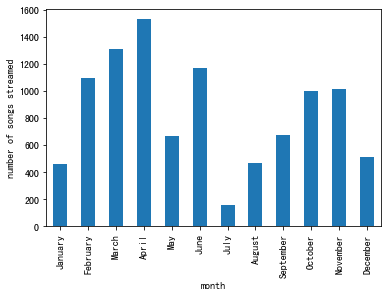

In [22]:
month_counts = spotify_streaming_frame['month'].value_counts()
months = ['January', 'February', 'March', 'April',
          'May', 'June', 'July', 'August',
          'September', 'October', 'November', 'December']

month_counts.reindex(months).plot.bar(xlabel='month', ylabel='number of songs streamed')

This data does not include a complete month of July, so that explains the very low stream count there, though we can see that my listening is generally not consistent from month to month. It would be interesting to see if the monthly behavior is similar across years, but I only have a year of data to look at. 

## Top
Here I look at my most listened to artists and songs

### Getting distinct tracks and play count

In [23]:
distinct_tracks = spotify_streaming_frame.groupby(['artistName', 'trackName']).size().reset_index().rename(columns={0:'playCount'})

In [24]:
distinct_tracks.head()

,artistName,trackName,playCount
0,(G)I-DLE,DON'T TEXT ME,1
1,(G)I-DLE,LATATA,2
2,(G)I-DLE,Oh my god,4
3,(G)I-DLE,Senorita,1
4,1.Cuz,Caravaggio,1


### Most played artists

In [25]:
top_10_artists = distinct_tracks.groupby(['artistName'])['playCount'].sum().nlargest(10)

In [26]:
top_10_artists

artistName
SEVENTEEN              825
ATEEZ                  650
Stray Kids             393
E'LAST                 299
BTS                    249
ONEWE                  217
THE 8                  206
Joe Hisaishi           171
Of Monsters and Men    170
文俊辉                    158
Name: playCount, dtype: int64

<AxesSubplot:title={'center':'Most Played Artists'}, xlabel='Artist', ylabel='Play Count'>

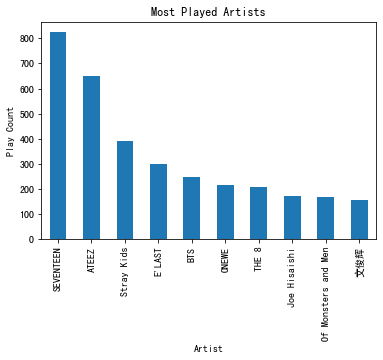

In [27]:
top_10_artists.plot.bar(xlabel='Artist', ylabel='Play Count', title='Most Played Artists')


In [28]:
artists_with_most_songs = distinct_tracks['artistName'].value_counts().nlargest(10)

In [29]:
artists_with_most_songs

SEVENTEEN              76
Stray Kids             57
ATEEZ                  47
BTS                    46
Regina Spektor         44
The Beatles            43
Joe Hisaishi           31
DooPiano               29
Of Monsters and Men    23
Sonya Belousova        23
Name: artistName, dtype: int64

<AxesSubplot:title={'center':"Artists with most songs I've listened to"}, xlabel='Artist', ylabel='Track Count'>

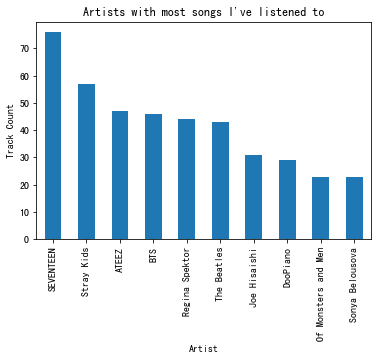

In [30]:
artists_with_most_songs.plot.bar(xlabel='Artist', ylabel='Track Count', title='Artists with most songs I\'ve listened to')


### Most played tracks

In [31]:
top_10_tracks = distinct_tracks.groupby(['artistName', 'trackName'])['playCount'].sum().nlargest(10)

In [32]:
top_10_tracks

artistName     trackName                                                                           
นนน กรภัทร์    แค่เพื่อนมั้ง (Just Friend?) - เพลงประกอบซีรีส์ แค่เพื่อนครับเพื่อน BAD BUDDY SERIES    122
SEVENTEEN      Anyone                                                                                  112
THE 8          Side By Side - Chinese Version                                                          106
The Lumineers  Ophelia                                                                                 101
SEVENTEEN      Rock with you                                                                            90
THE 8          Maze - 电视剧《永远的主君》原声音乐                                                                    71
ATEEZ          Not Too Late                                                                             69
E'LAST         Dark Dream                                                                               69
文俊辉            Dream - 电视剧《永远的主君》原声音乐       

<AxesSubplot:title={'center':'Most played tracks'}, xlabel='(Artist, Track Name)', ylabel='Play Count'>

/home/yasmeen/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/yasmeen/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 3585 (\N{THAI CHARACTER KO KAI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/yasmeen/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/yasmeen/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 3616 (\N{THAI CHARACTER PHO SAMPHAO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/yasmeen/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 3633 (\N{THAI CHARACTER MAI HAN-AKAT}) missing from current font.
  fig.c

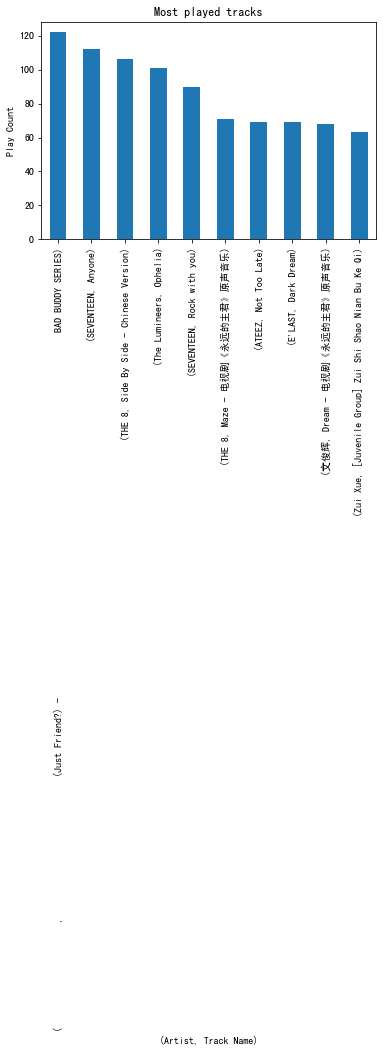

In [33]:
top_10_tracks.plot.bar(title='Most played tracks', xlabel='(Artist, Track Name)', ylabel='Play Count')
# Note! Cannot display both Chinese and Thai at the same time. 

## Title Languages
Here I look at what languages the titles of my streamed songs are.

My initial plan had been to look at the languages of the lyrics, however, I was not able to find a suitable lyrics API. `lyricgenius` produces a lot of junk, such as romanized lyrics and interviews, and the official `Genius API` does not allow lyrics access. The Genius TOS also does not allow scraping of the lyrics. The free version of the `MusixMatch API` does not allow enough API calls for this project. 

In [34]:
import pycld2 as cld2

In [35]:
def get_languages(title):
    isReliable, textBytesFound, details = cld2.detect(title)
    return details[0][0]

In [36]:
distinct_tracks['titleLanguage'] = distinct_tracks['trackName'].apply(lambda x: get_languages(x))

In [37]:
distinct_tracks

,artistName,trackName,playCount,titleLanguage
0,(G)I-DLE,DON'T TEXT ME,1,Unknown
1,(G)I-DLE,LATATA,2,Unknown
2,(G)I-DLE,Oh my god,4,ENGLISH
3,(G)I-DLE,Senorita,1,Unknown
4,1.Cuz,Caravaggio,1,Unknown
...,...,...,...,...
2725,須田景凪,無垢,1,Unknown
2726,黄宇弘,击溃 - 电视剧《长歌行》配乐,1,Chinese
2727,黄宇弘,征途 - 电视剧《长歌行》配乐,1,Chinese
2728,신유진,Paradox,1,Unknown


In [38]:
distinct_tracks['titleLanguage'].value_counts()

Unknown         1329
ENGLISH         1104
Japanese          64
SWEDISH           60
Chinese           57
ChineseT          17
DANISH            16
FRENCH            13
NORWEGIAN_N        9
THAI               7
Korean             7
SCOTS              5
NORWEGIAN          4
IRISH              4
LATIN              3
CORSICAN           2
PORTUGUESE         2
ITALIAN            2
MALAY              2
WOLOF              2
HAUSA              1
GALICIAN           1
LINGALA            1
AFAR               1
BRETON             1
GERMAN             1
SPANISH            1
OCCITAN            1
MALAGASY           1
XHOSA              1
HAWAIIAN           1
ICELANDIC          1
POLISH             1
ALBANIAN           1
MANX               1
RUNDI              1
FINNISH            1
SCOTS_GAELIC       1
KINYARWANDA        1
TURKMEN            1
INDONESIAN         1
Name: titleLanguage, dtype: int64

We can see some issues here:
- about half of the titles' languages were returned as unknown. 
- a number of titles were misclassified

In [39]:
distinct_tracks.loc[distinct_tracks['titleLanguage'] != 'Unknown']

,artistName,trackName,playCount,titleLanguage
2,(G)I-DLE,Oh my god,4,ENGLISH
6,5 Seconds of Summer,Youngblood,4,ENGLISH
7,777 (Triple Seven),PRESENTE - Spanish Version,1,ENGLISH
9,A Samurai In Tokyo,Demon Slayer (Zenitsu Theme),1,ENGLISH
12,A.C.E,Down (feat. Grey),16,ENGLISH
...,...,...,...,...
2722,陳楚生,招摇 - 电视剧《招摇》同名主题曲,2,Chinese
2723,陸虎,月出 (電視劇《皓鑭傳》片頭曲),1,ChineseT
2724,霍尊,锦书来 - 网剧《山河令》插曲,16,Chinese
2726,黄宇弘,击溃 - 电视剧《长歌行》配乐,1,Chinese


In [40]:
distinct_tracks.loc[distinct_tracks['titleLanguage'] == 'HAUSA']

,artistName,trackName,playCount,titleLanguage
321,Billie Eilish,Oxytocin,1,HAUSA


In [41]:
distinct_tracks.loc[distinct_tracks['titleLanguage'] == 'AFAR']

,artistName,trackName,playCount,titleLanguage
1845,SEVENTEEN,Lilili Yabbay,1,AFAR


In [42]:
distinct_tracks.loc[distinct_tracks['titleLanguage'] == 'XHOSA']

,artistName,trackName,playCount,titleLanguage
1694,Red Velvet,Zimzalabim,1,XHOSA


In [43]:
distinct_tracks.loc[distinct_tracks['titleLanguage'] == 'DANISH']

,artistName,trackName,playCount,titleLanguage
128,Albin Johnsén,Betyder ingenting,1,DANISH
164,Andrew McMahon in the Wilderness,Synesthesia,17,DANISH
165,André Zuniga,Som om vi aldrig ses igen,1,DANISH
431,Carola,Säg mig var du står,2,DANISH
1161,Linnea Henriksson,En dålig idé,1,DANISH
1311,Miriam Bryant,Du Med Dig,10,DANISH
1324,Miss Li,Utan dig,9,DANISH
1454,Norlie & KKV,Ingen annan rör mig som du,2,DANISH
1557,Owen,Kan ej med mig,1,DANISH
1670,Rainych,Haru wo Tsugeru,3,DANISH


Here we can see that many songs with Swedish titles were classified as being Danish, as well as a few in English, and one romanized Japanese title. 

In [44]:
distinct_tracks.loc[distinct_tracks['titleLanguage'] == 'WOLOF']

,artistName,trackName,playCount,titleLanguage
793,Hai Lin,Wu Ji - Instrumental Ver.,3,WOLOF
794,Hai Lin,Wu Ji - Piano Ver.,2,WOLOF


Above we can see that romanized titles are a problem: this romanized Chinese title was classified as Wolof. 